<a href="https://colab.research.google.com/github/Anjali-P-Subhash/machine-learning/blob/main/cancer_data_KNN(af).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving can.csv to can (2).csv


{'can (2).csv': b'Name,Surname,Age,Smokes,AreaQ,Alkhol,Result\r\nJohn,Wick,35,3,5,4,1\r\nJohn,Constantine,27,20,2,5,1\r\nCamela,Anderson,30,0,5,2,0\r\nAlex,Telles,28,0,8,1,0\r\nDiego,Maradona,68,4,5,6,1\r\nCristiano,Ronaldo,34,0,10,0,0\r\nMihail,Tal,58,15,10,0,0\r\nKathy,Bates,22,12,5,2,0\r\nNicole,Kidman,45,2,6,0,0\r\nRay,Milland,52,18,4,5,1\r\nFredric,March,33,4,8,0,0\r\nYul,Brynner,18,10,6,3,0\r\nJoan,Crawford,25,2,5,1,0\r\nJane,Wyman,28,20,2,8,1\r\nAnna,Magnani,34,25,4,8,1\r\nKatharine,Hepburn,39,18,8,1,0\r\nKatharine,Hepburn,42,22,3,5,1\r\nBarbra,Streisand,19,12,8,0,0\r\nMaggie,Smith,62,5,4,3,1\r\nGlenda,Jackson,73,10,7,6,1\r\nJane,Fonda,55,15,1,3,1\r\nMaximilian,Schell,33,8,8,1,0\r\nGregory,Peck,22,20,6,2,0\r\nSidney,Poitier,44,5,8,1,0\r\nRex,Harrison,77,3,2,6,1\r\nLee,Marvin,21,20,5,3,0\r\nPaul,Scofield,37,15,6,2,0\r\nRod,Steiger,34,12,8,0,0\r\nJohn,Wayne,55,20,1,4,1\r\nGene,Hackman,40,20,2,7,1\r\nMarlon,Brando,36,13,5,2,0\r\nJack,Lemmon,56,20,3,3,1\r\nJack,Nicholson,47,15,1,8,1

In [ ]:
cancer_data=pd.read_csv('can.csv')
cancer_data

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [ ]:
cancer_data.isnull().sum()

,0
Name,0
Surname,0
Age,0
Smokes,0
AreaQ,0
Alkhol,0
Result,0


In [ ]:
cancer_data.dtypes

,0
Name,object
Surname,object
Age,int64
Smokes,int64
AreaQ,int64
Alkhol,int64
Result,int64


In [ ]:
x=cancer_data.iloc[:,:-1]
x

,Name,Surname,Age,Smokes,AreaQ,Alkhol
0,John,Wick,35,3,5,4
1,John,Constantine,27,20,2,5
2,Camela,Anderson,30,0,5,2
3,Alex,Telles,28,0,8,1
4,Diego,Maradona,68,4,5,6
5,Cristiano,Ronaldo,34,0,10,0
6,Mihail,Tal,58,15,10,0
7,Kathy,Bates,22,12,5,2
8,Nicole,Kidman,45,2,6,0
9,Ray,Milland,52,18,4,5


In [ ]:
y=cancer_data.iloc[:,-1]
y

,Result
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,1


In [ ]:
X=cancer_data.drop(['Name','Surname','Result'],axis=1)
Y=cancer_data['Result']

In [ ]:
X

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6
5,34,0,10,0
6,58,15,10,0
7,22,12,5,2
8,45,2,6,0
9,52,18,4,5


In [ ]:
Y

,Result
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,1


In [ ]:
x.dtypes

,0
Name,object
Surname,object
Age,int64
Smokes,int64
AreaQ,int64
Alkhol,int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Select only numeric columns for scaling
numerical_features = x.select_dtypes(include=np.number)
x_scaled=scaler.fit_transform(numerical_features)
x_scaled

array([[0.28813559, 0.08823529, 0.44444444, 0.5       ],
       [0.15254237, 0.58823529, 0.11111111, 0.625     ],
       [0.20338983, 0.        , 0.44444444, 0.25      ],
       [0.16949153, 0.        , 0.77777778, 0.125     ],
       [0.84745763, 0.11764706, 0.44444444, 0.75      ],
       [0.27118644, 0.        , 1.        , 0.        ],
       [0.6779661 , 0.44117647, 1.        , 0.        ],
       [0.06779661, 0.35294118, 0.44444444, 0.25      ],
       [0.45762712, 0.05882353, 0.55555556, 0.        ],
       [0.57627119, 0.52941176, 0.33333333, 0.625     ],
       [0.25423729, 0.11764706, 0.77777778, 0.        ],
       [0.        , 0.29411765, 0.55555556, 0.375     ],
       [0.11864407, 0.05882353, 0.44444444, 0.125     ],
       [0.16949153, 0.58823529, 0.11111111, 1.        ],
       [0.27118644, 0.73529412, 0.33333333, 1.        ],
       [0.3559322 , 0.52941176, 0.77777778, 0.125     ],
       [0.40677966, 0.64705882, 0.22222222, 0.625     ],
       [0.01694915, 0.35294118,

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=1,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 0.9787234042553191


In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('accuracy on test data:',test_data_accuracy)

accuracy on test data: 1.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y_new=model.predict([[3,5,8,9]])
y_new

array([1])

In [ ]:
if y_new==1:
  print("cancer diseases")
else:
  print("not cancer diseases")

cancer diseases


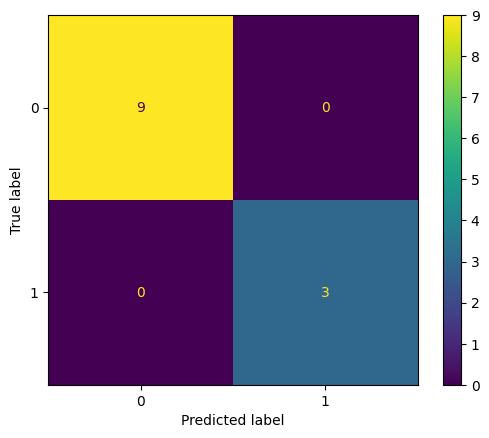

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,x_test_prediction))

In [ ]:
from sklearn.metrics import precision_score,recall_score
print("precision:",precision_score(y_test,x_test_prediction)*100)
print("recall:",recall_score(y_test,x_test_prediction)*100)

precision: 100.0
recall: 100.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x_test_prediction,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    1.0000    1.0000         3

    accuracy                         1.0000        12
   macro avg     1.0000    1.0000    1.0000        12
weighted avg     1.0000    1.0000    1.0000        12

